<a href="https://colab.research.google.com/github/MeghanGH/time-series-with-python/blob/main/Manipulating_time_series_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# nyc_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/nyc.csv'
# nyc = pd.read_csv(nyc_csv)
# nyc

Mounted at /content/drive


# How to use dates & times with pandas


In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


# Indexing & resampling time series


In [7]:
nyc_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/nyc.csv'
nyc = pd.read_csv(nyc_csv)
nyc.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


### Create a time series of air quality data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


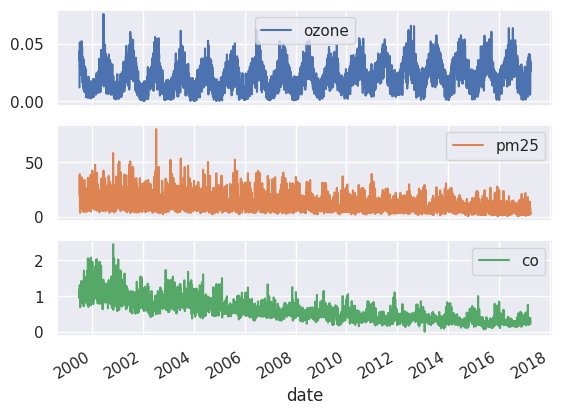

In [9]:
# Inspect data
print(nyc.info())

# Convert the date column to datetime64
nyc['date'] = pd.to_datetime(nyc['date'])

# Set date column as index
nyc.set_index('date', inplace=True)

# Inspect data
print(nyc.info())

# Plot data
nyc.plot(subplots=True)
plt.show()

### Compare annual stock price trends

In [11]:
yahoo_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/yahoo.csv'
yahoo = pd.read_csv(yahoo_csv)

# Convert the date column to datetime64
yahoo['date'] = pd.to_datetime(yahoo['date'])

# Set date column as index
yahoo.set_index('date', inplace=True)

yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


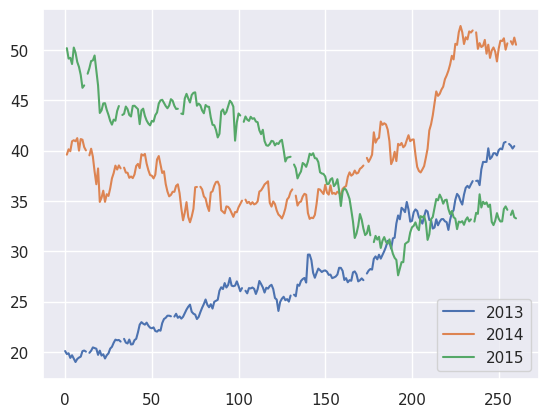

      2015
0      NaN
1    50.17
2    49.13
3    49.21
4    48.59
..     ...
256    NaN
257  33.60
258  34.04
259  33.37
260  33.26

[261 rows x 1 columns]
      2013   2014   2015
0    20.08    NaN    NaN
1    19.78  39.59  50.17
2    19.86  40.12  49.13
3    19.40  39.93  49.21
4    19.66  40.92  48.59
..     ...    ...    ...
256  40.65    NaN    NaN
257  40.49  50.86  33.60
258  40.20  50.53  34.04
259  40.44  51.22  33.37
260    NaN  50.51  33.26

[261 rows x 3 columns]


In [17]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

print(price_per_year)
print(prices)

In [22]:
yahoo.loc['2013', 'price']

date
2013-01-02    20.08
2013-01-03    19.78
2013-01-04    19.86
2013-01-07    19.40
2013-01-08    19.66
              ...  
2013-12-25      NaN
2013-12-26    40.65
2013-12-27    40.49
2013-12-30    40.20
2013-12-31    40.44
Name: price, Length: 260, dtype: float64

### Set and change time series frequency

In [40]:
co_cities_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/co_cities.csv'
co = pd.read_csv(co_cities_csv)
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [41]:
co.isna().sum()

date           0
Chicago        0
Los Angeles    0
New York       0
dtype: int64

In [42]:
# Convert the date column to datetime64
co['date'] = pd.to_datetime(co['date'])

# Set date column as index
co.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


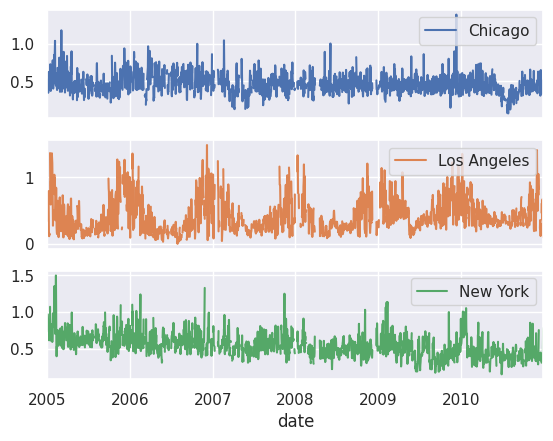

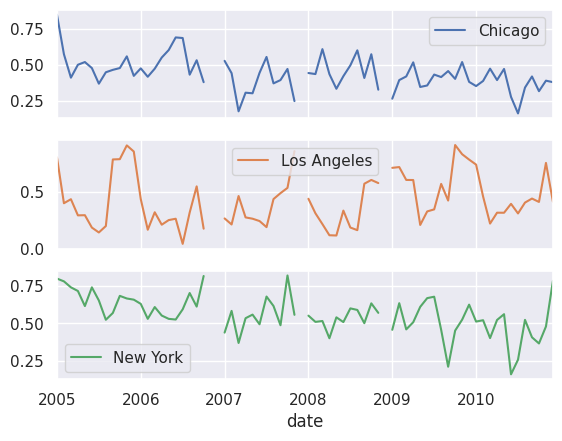

In [43]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()



# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

### Lags, changes, and returns for stock price series

In [55]:
google_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/google.csv'
google = pd.read_csv(google_csv, parse_dates=['Date'], index_col='Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


### Shifting stock prices across time

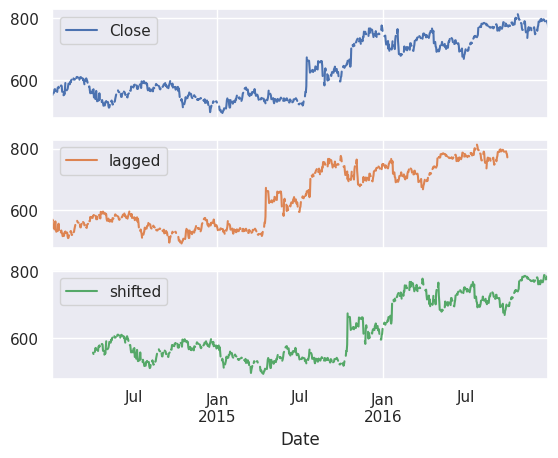

In [57]:
# Set data frequency to business daily
google = google.asfreq('D')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(subplots=True)
plt.show()



### Calculating stock price changes

In [58]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


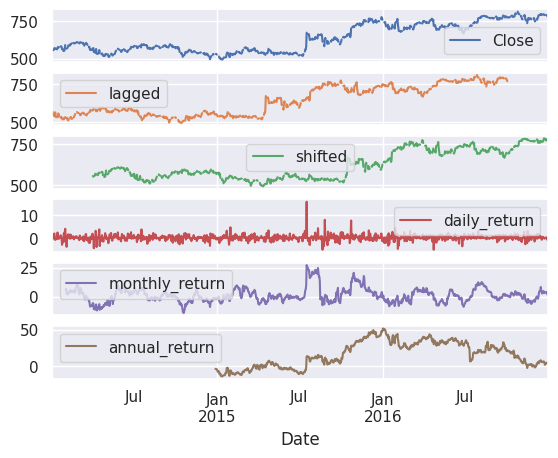

In [59]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()
